# Project 7, Support vector machine classifier Implementation

# 1, Implementing the svm classifier without using sk-learn.
# 2, Implementing soft margin SVM is required.
# 3, classifier evaluation required.
# 4, Compare your implementation with Sk-learn corresponding classifiers.


## 数据集
- 使用sklearn的make_blobs
- 100个2特征[1,0]随机生成点

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.datasets import make_blobs

In [2]:
# 生成数据集
(X, y) = make_blobs(n_samples=100,
                    n_features=2,
                    centers=2,
                    cluster_std=1.05,
                    random_state=40)

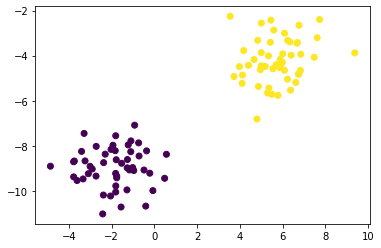

In [3]:
plt.scatter(X[:,0],X[:,1],marker='o', c=y)
plt.show()

In [4]:
# 设置数据正负样本
positive_data = list()
negative_data = list()
for i, val in enumerate(y):
    if val == 0:
        negative_data.append(X[i])
    else:
        positive_data.append(X[i])

data_dict = {1: np.array(positive_data), -1: np.array(negative_data)}
# print(data_dict)

In [5]:
# 定义最大最小特征值
def max_min_feature(data_dict):
    max_feature_value = float('-inf')
    min_feature_value = float('+inf')
    for yi in data_dict:
        if np.amax(data_dict[yi]) > max_feature_value:
            max_feature_value = np.amax(data_dict[yi])

        if np.amin(data_dict[yi]) < min_feature_value:
            min_feature_value = np.amin(data_dict[yi])
    return max_feature_value, min_feature_value

In [6]:
# SVM实现
def svm_training(data_dict, learning_rates):
    i = 1
    w = []
    b = []
    length_w_vector = {}
    transforms = [[1, 1], [-1, 1], [-1, -1], [1, -1]]
    b_step_size = 2
    b_multiple = 5
    w_optimum = max_feature_value * 0.5
    # 迭代学习率
    for rate in learning_rates:
        w = np.array([w_optimum, w_optimum])
        optimized = False
        while not optimized:
            for b in np.arange(-1 * (max_feature_value * b_step_size), max_feature_value * b_step_size,
                               rate * b_multiple):
                for transformation in transforms:
                    w_t = w * transformation
                    correctly_classified = True

                    for yi in data_dict:
                        for xi in data_dict[yi]:
                            if yi * (np.dot(w_t, xi) + b) < 1:
                                correctly_classified = False

                    if correctly_classified:
                        length_w_vector[np.linalg.norm(w_t)] = [w_t, b]
            if w[0] < 0:
                optimized = True
            else:
                w = w - rate

        norms = sorted([n for n in length_w_vector])

        minimum_w_length = length_w_vector[norms[0]]
        w = minimum_w_length[0]
        b = minimum_w_length[1]
    return w, b

In [7]:
max_feature_value, min_feature_value = max_min_feature(data_dict)
learning_rates = [max_feature_value * 0.1,
                  max_feature_value * 0.01,
                  max_feature_value * 0.001]

w, b = svm_training(data_dict, learning_rates)
print(w, b)

[0.35644072 0.35644072] 1.7822035991446015


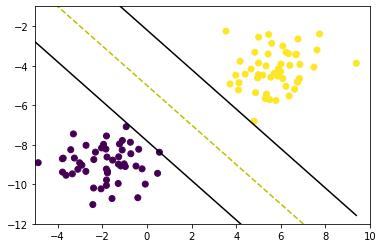

In [8]:
colors = {1:'r',-1:'b'}
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# 超平面可视化
def visualize(data_dict):
    # 扁平化X
    X1 = np.c_[np.ones((X.shape[0])), X]
    plt.scatter(X1[:, 1], X1[:, 2], marker='o', c=y)

    # hyperplane = x.w+b
    # v = x.w+b
    # psv = 1
    # nsv = -1
    # dec = 0
    def hyperplane_value(x, w, b, v):
        return (-w[0] * x - b + v) / w[1]

    datarange = (min_feature_value * 0.9, max_feature_value * 1.)
    hyp_x_min = datarange[0]
    hyp_x_max = datarange[1]

    # (w.x+b) = 1
    psv1 = hyperplane_value(hyp_x_min, w, b, 1)
    psv2 = hyperplane_value(hyp_x_max, w, b, 1)
    ax.plot([hyp_x_min, hyp_x_max], [psv1, psv2], 'k')

    # (w.x+b) = -1
    nsv1 = hyperplane_value(hyp_x_min, w, b, -1)
    nsv2 = hyperplane_value(hyp_x_max, w, b, -1)
    ax.plot([hyp_x_min, hyp_x_max], [nsv1, nsv2], 'k')

    # (w.x+b) = 0
    db1 = hyperplane_value(hyp_x_min, w, b, 0)
    db2 = hyperplane_value(hyp_x_max, w, b, 0)
    ax.plot([hyp_x_min, hyp_x_max], [db1, db2], 'y--')

    plt.axis([-5, 10, -12, -1])
    plt.show()

visualize(data_dict)

In [9]:
# 对 y=0 --> y=-1处理
for i, v in enumerate(y):
    if v==0:
        y[i]=-1

In [10]:
# 预测
def predict(features):
    # sign( x.w+b )
    dot_result = np.sign(np.dot(np.array(features),w)+b)
    return dot_result.astype(int)

y_hat = predict(X)

In [11]:
# 准确率
def show_accuracy(y, y_hat):
    acc = y.ravel() == y_hat.ravel()
    return float(acc.sum()) / y_hat.size
    
print("准确率：" + str(show_accuracy(y, y_hat)*100) + "%")

准确率：100.0%


# 4, Compare your implementation with Sk-learn corresponding classifiers.

In [12]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

In [13]:
clf = SVC()
clf.fit(X, y) 
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC(gamma='auto')

In [14]:
print("sklearn score: " + str(clf.score(X,y)))

sklearn score: 1.0
